 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [153]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [154]:
# Reading whale returns
whale_returns_csv_path = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(ascending=True,inplace=True)

In [155]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [156]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [157]:
# Reading algorithmic returns
algo_returns_csv_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(ascending=True,inplace=True)

In [158]:
# Count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [159]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [160]:
# Reading S&P 500 Closing Prices
sp500_history_csv_path = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(ascending=True,inplace=True)

In [161]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [162]:
# Fix Data Types
sp500_history_df_string=sp500_history_df.astype('string')
sp500_history_df_string['Close']=sp500_history_df_string['Close'].str.replace('$','',regex=False)
sp500_history_df_float=sp500_history_df_string.astype('float')

In [163]:
# Calculate Daily Returns
sp500_history_daily_return_df=sp500_history_df_float.pct_change()

In [164]:
# Drop nulls
sp500_history_daily_return_df.dropna(inplace=True)

In [165]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_daily_return_df.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_history_daily_return_df.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [166]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df=pd.concat([whale_returns_df,algo_returns_df,sp500_history_daily_return_df], axis='columns',join='inner')
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Daily Return'}, xlabel='Date'>

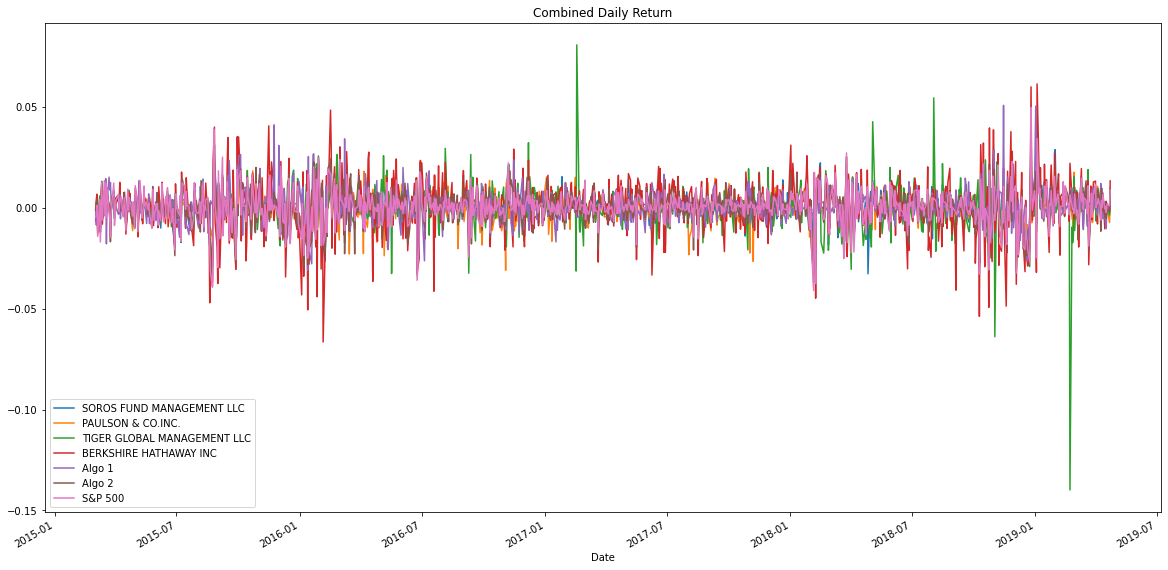

In [238]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10),title="Combined Daily Return")

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

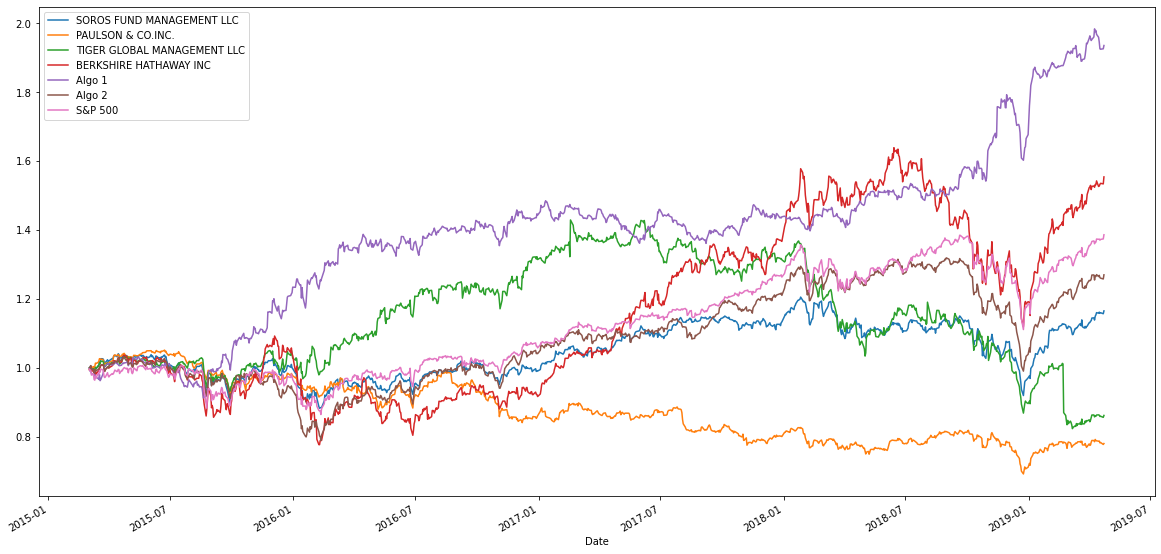

In [168]:
# Calculate cumulative returns of all portfolios
cumulative_df=(1+combined_df).cumprod()
# Plot cumulative returns
cumulative_df.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

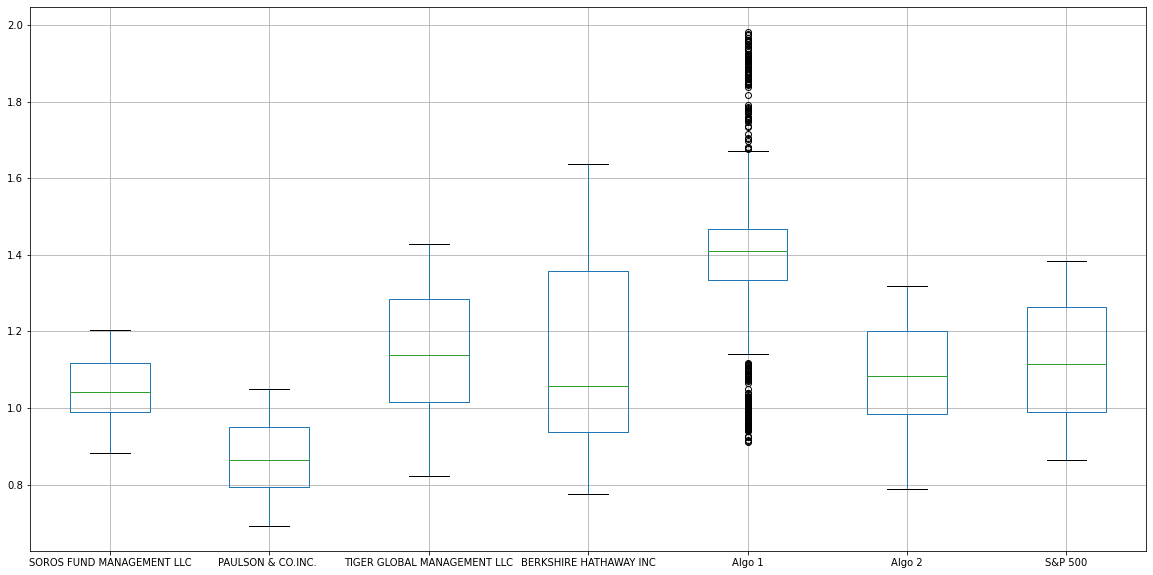

In [169]:
# Box plot to visually show risk
cumulative_df.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [170]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [171]:
# method to calculate volatility
print(combined_df.std() * np.sqrt(252))
volatility = combined_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64


In [173]:
# Calculate  the daily standard deviation of S&P 500
sp500_std_df=combined_df['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
all_std_df=pd.DataFrame({'std':combined_df.std()})
# Use df filter to remove less riskier data
riskier_than_sp500=all_std_df[all_std_df['std']>sp500_std_df]
print(riskier_than_sp500)


                                  std
TIGER GLOBAL MANAGEMENT LLC  0.010894
BERKSHIRE HATHAWAY INC       0.012919


### Calculate the Annualized Standard Deviation

In [174]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation for all Porfolios using a 21-day window'}, xlabel='Date'>

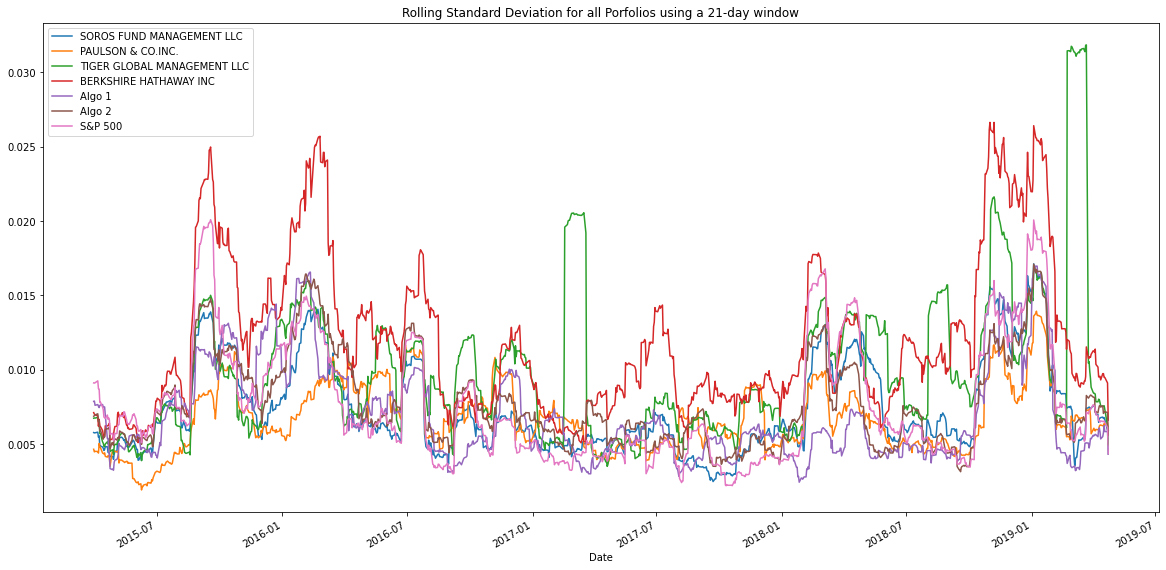

In [239]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_df=combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_df.plot(figsize=(20, 10),title="Rolling Standard Deviation for all Porfolios using a 21-day window")

### Calculate and plot the correlation

<AxesSubplot:>

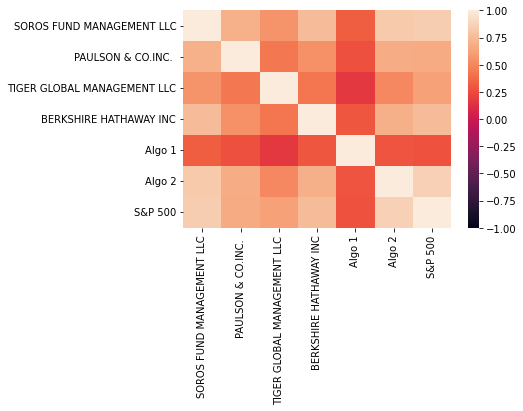

In [176]:
# Calculate the correlation
correlation_df=combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation_df, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Beta for bershire hathaway inc 0.4975013478956267


<AxesSubplot:title={'center':'Beta for Bershire Hathaway Inc with 60 day rolling window'}, xlabel='Date'>

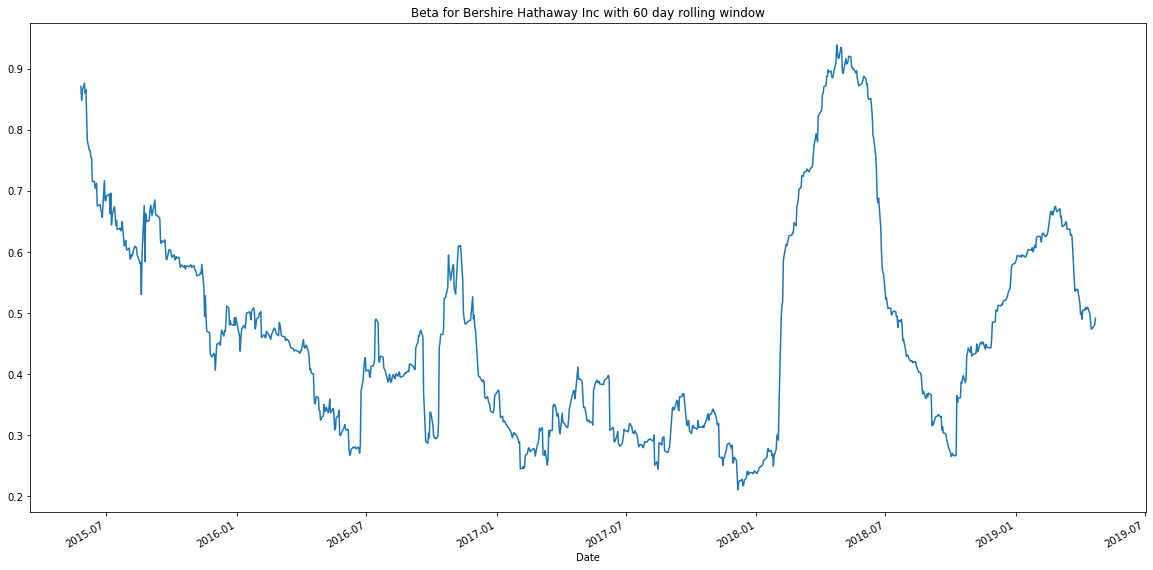

In [240]:
# Calculate covariance of a single portfolio
berkshire_hathaway_inc_cov=combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
berkshire_hathaway_inc_var = combined_df['BERKSHIRE HATHAWAY INC'].var()
# Computing beta
berkshire_hathaway_inc_beta=berkshire_hathaway_inc_cov/berkshire_hathaway_inc_var
print(f'Beta for bershire hathaway inc {berkshire_hathaway_inc_beta}')
# Plot beta trend
berkshire_hathaway_inc_cov=combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
berkshire_hathaway_inc_var = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).var()
# Computing beta
berkshire_hathaway_inc_beta=berkshire_hathaway_inc_cov/berkshire_hathaway_inc_var
berkshire_hathaway_inc_beta.plot(title="Beta for Bershire Hathaway Inc with 60 day rolling window",figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Beta for Bershire Hathaway Inc using EWM'}, xlabel='Date'>

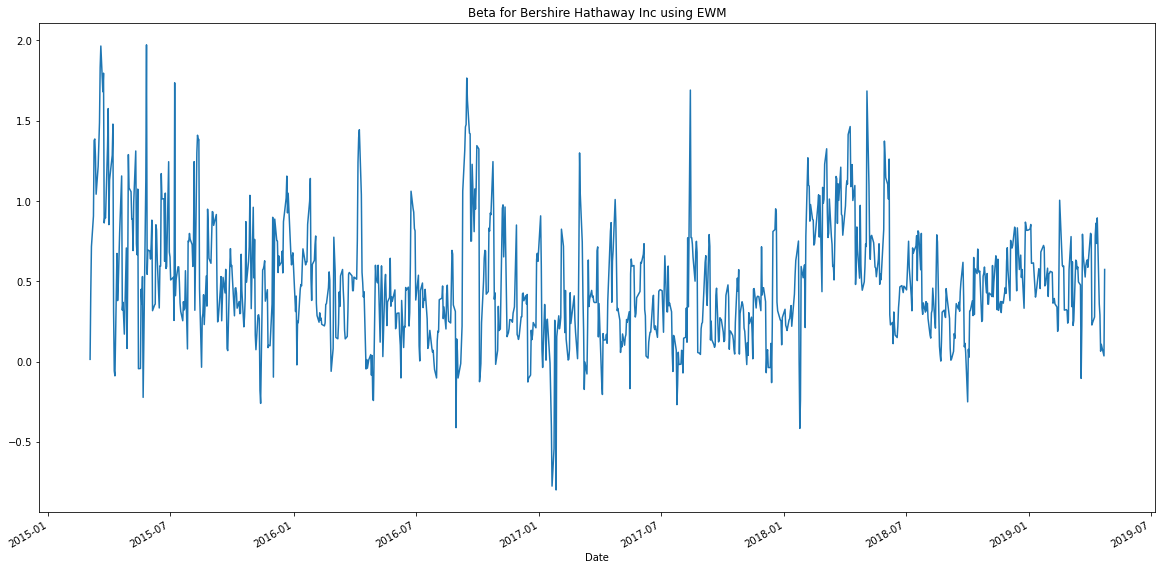

In [237]:
# Use `ewm` to calculate the rolling window

# Plot beta trend
berkshire_hathaway_inc_cov=combined_df['BERKSHIRE HATHAWAY INC'].ewm(halflife=dt.timedelta(days=21), times=combined_df.index).cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
berkshire_hathaway_inc_var = combined_df['BERKSHIRE HATHAWAY INC'].ewm(halflife=dt.timedelta(days=21), times=combined_df.index).var()
# Computing beta
berkshire_hathaway_inc_beta=berkshire_hathaway_inc_cov/berkshire_hathaway_inc_var
berkshire_hathaway_inc_beta.plot(title="Beta for Bershire Hathaway Inc using EWM",figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [179]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

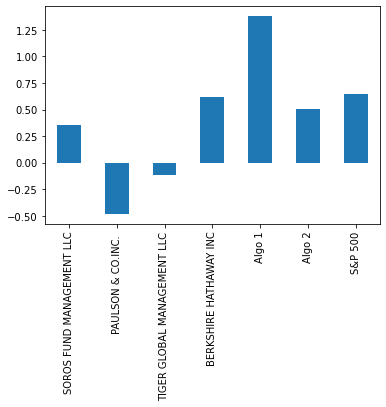

In [180]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperformed both  the market (S&P 500) and the whales portfolios because it has the highest sharpe ratio. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [181]:
# Reading data from 1st stock
arkk_returns_csv_path = Path("Resources/arkk.csv")
arkk_returns_df = pd.read_csv(arkk_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
arkk_returns_df.sort_index(ascending=True,inplace=True)
arkk_returns_df['ticker']='arkk'
arkk_returns_df.index=pd.DatetimeIndex(arkk_returns_df.index).normalize()
arkk_returns_df.head()



Close ticker
Date                    
2014-10-31  20.38   arkk
2014-11-03  20.38   arkk
2014-11-04  20.26   arkk
2014-11-05  20.00   arkk
2014-11-06  20.14   arkk

In [182]:
# Reading data from 2nd stock
tgt_returns_csv_path = Path("Resources/tgt.csv")
tgt_returns_df = pd.read_csv(tgt_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
tgt_returns_df.sort_index(ascending=True,inplace=True)
tgt_returns_df['ticker']='tgt'
tgt_returns_df.index=pd.DatetimeIndex(tgt_returns_df.index).normalize()
tgt_returns_df.head()

Close ticker
Date                    
2014-01-15  61.56    tgt
2014-01-16  60.81    tgt
2014-01-17  60.24    tgt
2014-01-21  59.20    tgt
2014-01-22  58.98    tgt

In [183]:
# Reading data from 3rd stock
unh_returns_csv_path = Path("Resources/unh.csv")
unh_returns_df = pd.read_csv(unh_returns_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
unh_returns_df.sort_index(ascending=True,inplace=True)
unh_returns_df['ticker']='unh'
unh_returns_df.index=pd.DatetimeIndex(unh_returns_df.index).normalize()
unh_returns_df.head()

Close ticker
Date                    
2014-01-15  74.84    unh
2014-01-16  72.76    unh
2014-01-17  72.52    unh
2014-01-21  73.16    unh
2014-01-22  73.40    unh

In [184]:
# Combine all stocks in a single DataFrame
my_stocks_combined_df=pd.concat([tgt_returns_df,unh_returns_df,arkk_returns_df],axis='rows',join='inner')
my_stocks_combined_df.head()

Close ticker
Date                    
2014-01-15  61.56    tgt
2014-01-16  60.81    tgt
2014-01-17  60.24    tgt
2014-01-21  59.20    tgt
2014-01-22  58.98    tgt

In [185]:
# Reset Date index
my_stocks_combined_df.reset_index()

Date  Close ticker
0    2014-01-15  61.56    tgt
1    2014-01-16  60.81    tgt
2    2014-01-17  60.24    tgt
3    2014-01-21  59.20    tgt
4    2014-01-22  58.98    tgt
...         ...    ...    ...
3560 2019-01-08  40.22   arkk
3561 2019-01-09  41.48   arkk
3562 2019-01-10  41.69   arkk
3563 2019-01-11  41.78   arkk
3564 2019-01-14  41.03   arkk

[3565 rows x 3 columns]

In [186]:
# Reorganize portfolio data by having a column per symbol
my_stocks_combined_pivot_df=my_stocks_combined_df.pivot_table(values="Close", index="Date", columns="ticker")

In [187]:
# Calculate daily returns
my_stocks_combined_daily_return_df=my_stocks_combined_pivot_df.pct_change()
# Drop NAs
my_stocks_combined_daily_return_df.dropna(inplace=True)
# Display sample data
my_stocks_combined_daily_return_df.tail(100)

ticker          arkk       tgt       unh
Date                                    
2018-08-21  0.021345 -0.000600 -0.002706
2018-08-22  0.000844  0.032064 -0.003630
2018-08-23 -0.001476  0.008960  0.002608
2018-08-24  0.015209  0.006920  0.010940
2018-08-27  0.017062 -0.008132  0.010595
...              ...       ...       ...
2019-01-08  0.002993 -0.001005  0.013371
2019-01-09  0.031328  0.009769  0.001439
2019-01-10  0.005063 -0.028454  0.005048
2019-01-11  0.002159  0.019329  0.011435
2019-01-14 -0.017951 -0.011062  0.001575

[100 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [188]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return_df=my_stocks_combined_daily_return_df.dot(weights)
# Display sample data
portfolio_return_df.head()

Date
2014-11-03   -0.001766
2014-11-04   -0.002732
2014-11-05   -0.002758
2014-11-06    0.007959
2014-11-07    0.002941
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [206]:
# Join your returns DataFrame to the original returns DataFrame
all_df=pd.concat([portfolio_return_df,combined_df],axis='columns',join='inner')
all_df.rename(columns={0:'MY PORTFOLIO'},inplace=True)
all_df

MY PORTFOLIO  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                      
2015-03-03     -0.005595                  -0.001266           -0.004981   
2015-03-04     -0.000236                   0.002230            0.003241   
2015-03-05      0.006942                   0.004016            0.004076   
2015-03-06     -0.015699                  -0.007905           -0.003574   
2015-03-09      0.009134                   0.000582            0.004225   
...                  ...                        ...                 ...   
2019-01-08      0.005119                   0.010760            0.008050   
2019-01-09      0.014178                   0.008630           -0.000800   
2019-01-10     -0.006114                   0.002869           -0.000388   
2019-01-11      0.010974                   0.011190            0.004232   
2019-01-14     -0.009146                  -0.001999           -0.005161   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-01-08                     0.001544                0.005851  0.010825   
2019-01-09                    -0.000534                0.019788  0.000214   
2019-01-10                     0.007423                0.003163  0.003087   
2019-01-11                     0.002051               -0.002152 -0.005112   
2019-01-14                     0.007798               -0.001253 -0.005642   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944  
...              ...       ...  
2019-01-08  0.010479  0.009695  
2019-01-09  0.009658  0.004098  
2019-01-10  0.003366  0.004518  
2019-01-11  0.003885 -0.000146  
2019-01-14 -0.006659 -0.005258  

[975 rows x 8 columns]

In [208]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df.dropna(inplace=True)
all_df.head()

MY PORTFOLIO  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                      
2015-03-03     -0.005595                  -0.001266           -0.004981   
2015-03-04     -0.000236                   0.002230            0.003241   
2015-03-05      0.006942                   0.004016            0.004076   
2015-03-06     -0.015699                  -0.007905           -0.003574   
2015-03-09      0.009134                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [209]:
# Calculate the annualized `std`
all_df.std()*np.sqrt(252)

MY PORTFOLIO                   0.173187
SOROS FUND MANAGEMENT LLC      0.126388
PAULSON & CO.INC.              0.112325
TIGER GLOBAL MANAGEMENT LLC    0.160980
BERKSHIRE HATHAWAY INC         0.207354
Algo 1                         0.123444
Algo 2                         0.133950
S&P 500                        0.137726
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

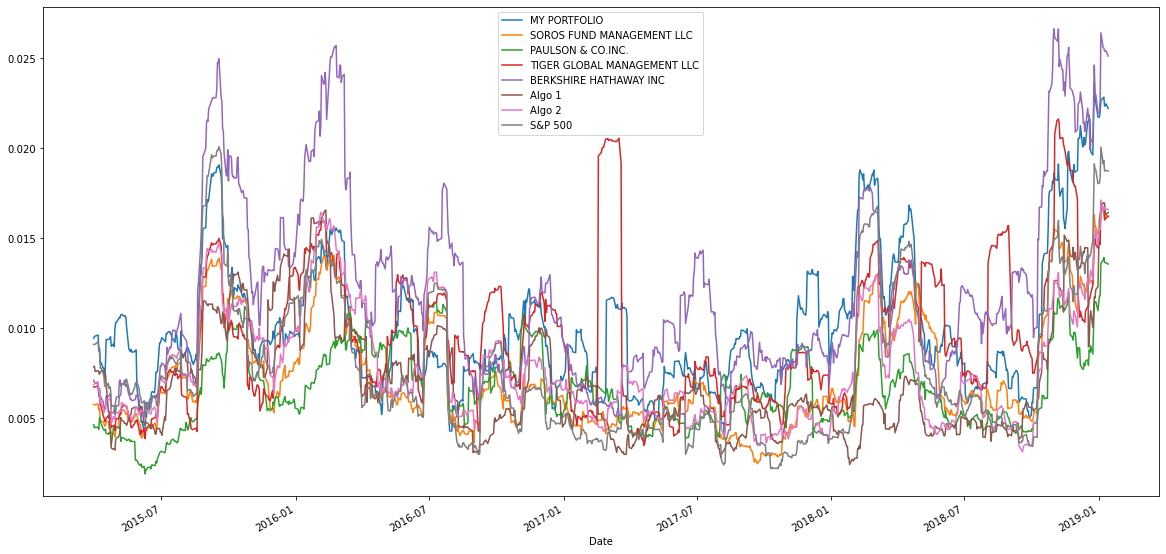

In [211]:
# Calculate rolling standard deviation
all_std_rolling_df=all_df.rolling(window=21).std()
# Plot rolling standard deviation
all_std_rolling_df.plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

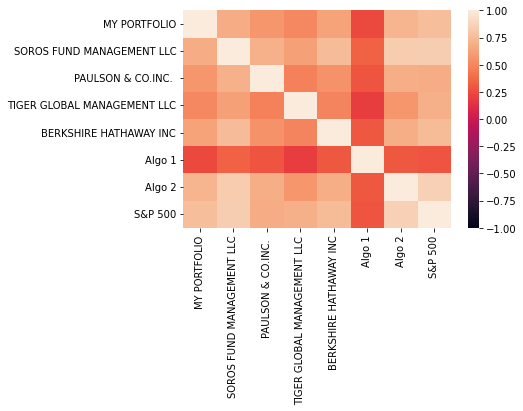

In [216]:
# Calculate and plot the correlation
all_corr_df=all_df.corr()
sns.heatmap(all_corr_df, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Beta for my portfolio 0.6034231907360519


<AxesSubplot:xlabel='Date'>

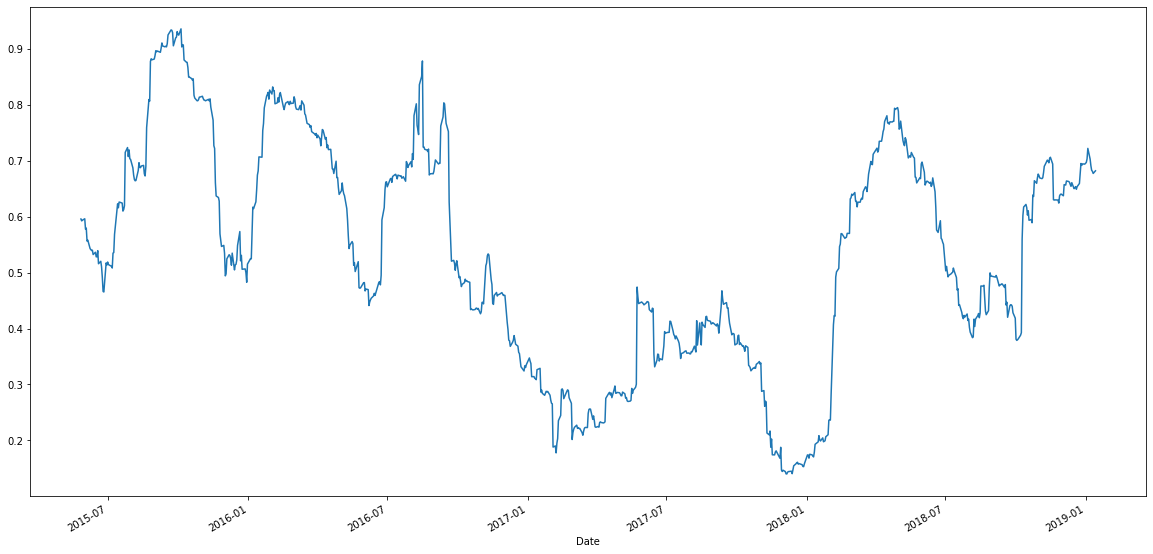

In [220]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
my_portfolio_cov=all_df['MY PORTFOLIO'].cov(all_df['S&P 500'])
# Calculate variance of S&P 500
my_portfolio_var = all_df['MY PORTFOLIO'].var()
# Computing beta
my_portfolio_beta=my_portfolio_cov/my_portfolio_var
print(f'Beta for my portfolio {my_portfolio_beta}')
# Plot beta trend
my_portfolio_cov=all_df['MY PORTFOLIO'].rolling(window=60).cov(all_df['S&P 500'])
# Calculate variance of S&P 500
my_portfolio_var = all_df['MY PORTFOLIO'].rolling(window=60).var()
# Computing beta
my_portfolio_beta=my_portfolio_cov/my_portfolio_var
my_portfolio_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

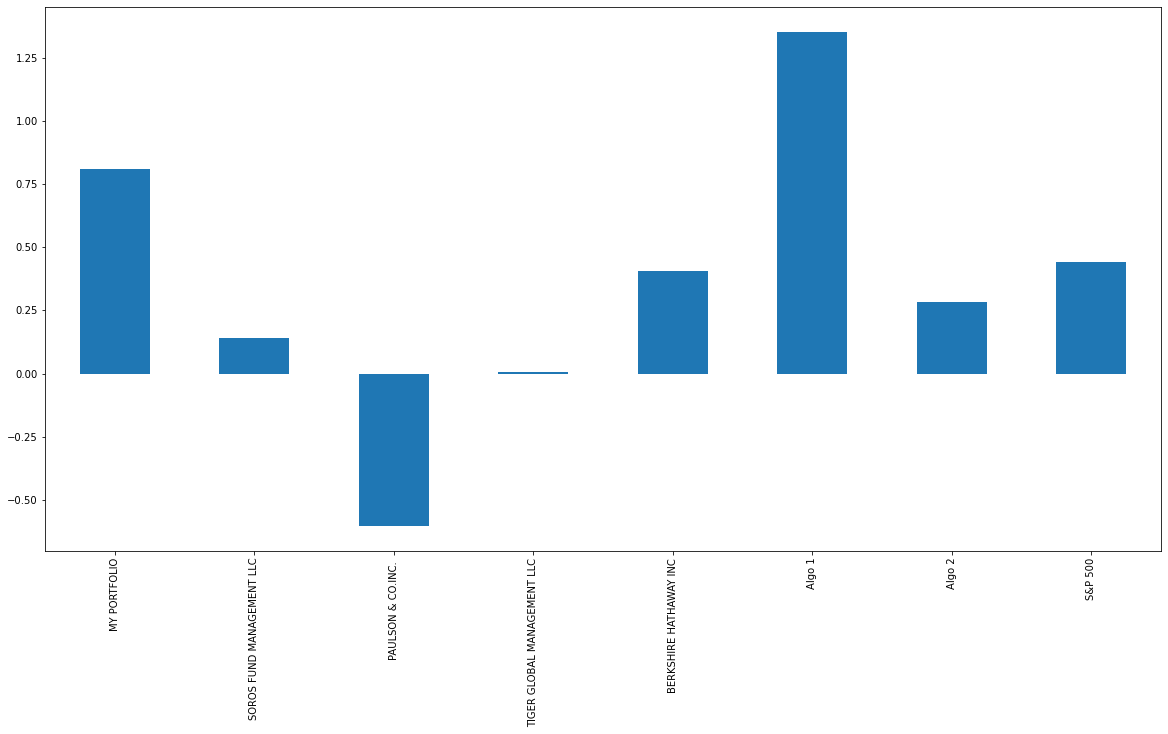

In [224]:
# Calculate Annualized Sharpe Ratios
my_portfolio_sharpe_ratios = (all_df.mean() * 252) / (all_df.std() * np.sqrt(252))


In [196]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_sharpe_ratios.plot.bar(figsize=(20, 10))

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio is better than all the whale return, s&p500 and algo 2. Only algo 1 is better than my portfolio